#**HOUSE PRICE PREDICTION**
> OMAR ELSAYED 43-9121




In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

### LOADING DATA

In [104]:
data = load_boston()
feature_names = data.feature_names
df = pd.DataFrame(data.data, columns=data.feature_names)
df['MEDV'] = pd.Series(data.target)
df

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


### ANALYSIS 

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [106]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


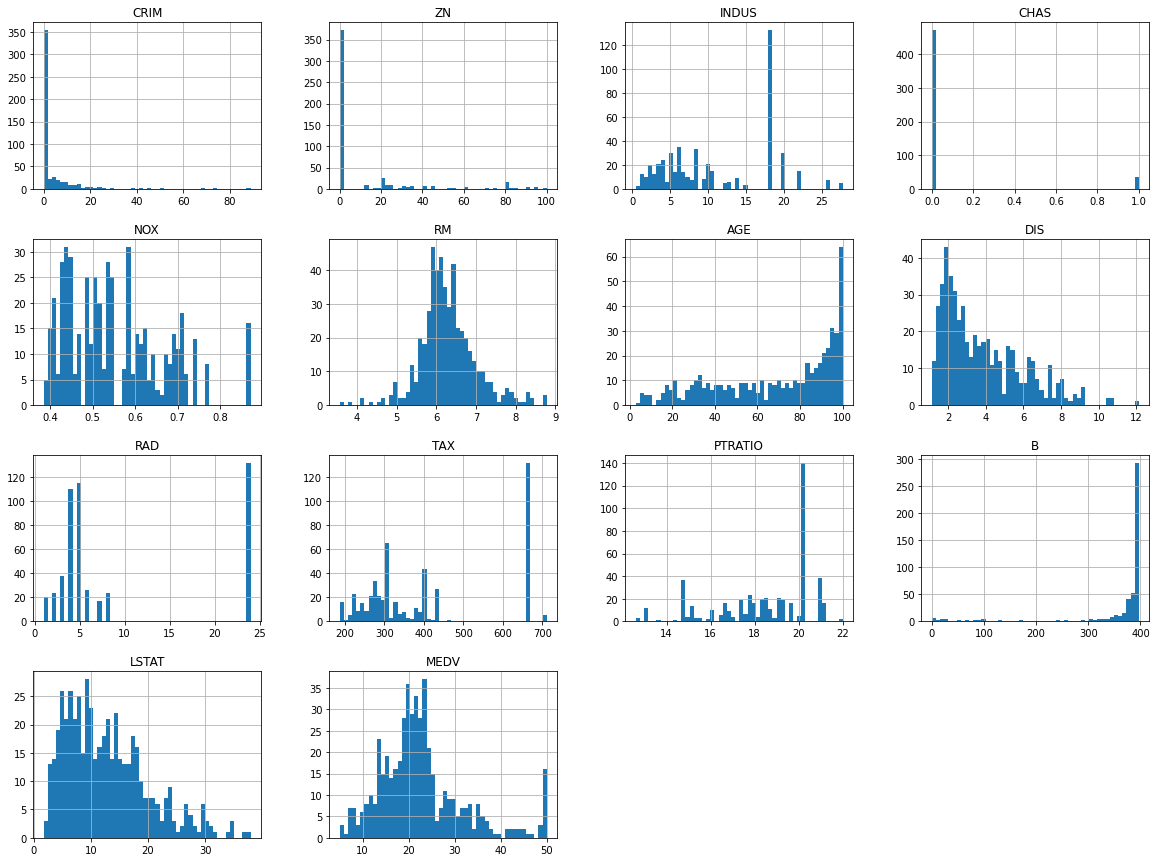

In [107]:
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

In [108]:
print(df['B'].value_counts())
(df['B']==396.9).sum()

396.90    121
393.74      3
395.24      3
376.14      2
394.72      2
         ... 
240.16      1
389.61      1
374.43      1
338.92      1
391.99      1
Name: B, Length: 357, dtype: int64


121

In [109]:
# the B looks like it has been capped at 396.9
#df.drop('B',axis=1, inplace=True)



In [110]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [111]:
correlation=df.corr()

correlation["MEDV"].sort_values(ascending=False)

MEDV       1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdc0ddfe490>,
      dtype=object)

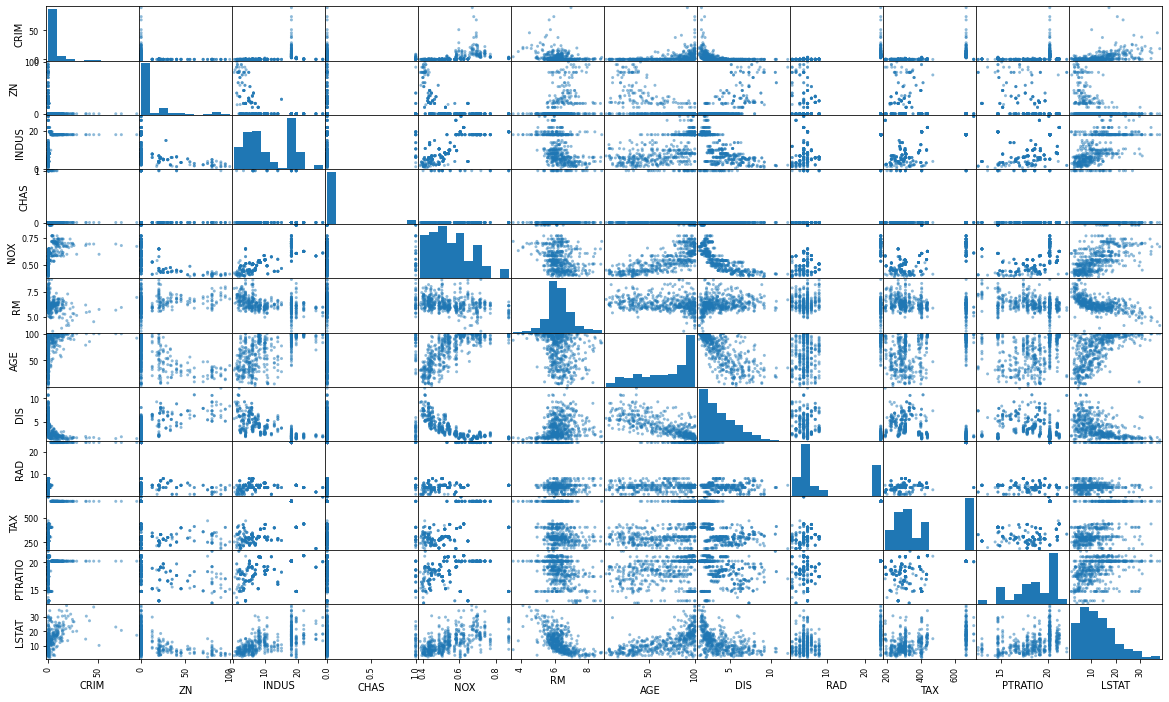

In [112]:

from pandas.plotting import scatter_matrix
attr = ["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","LSTAT"]
scatter_matrix(df[attr],figsize=(20,12))


In [113]:
correlation["NOX"].sort_values(ascending=False)

NOX        1.000000
INDUS      0.763651
AGE        0.731470
TAX        0.668023
RAD        0.611441
LSTAT      0.590879
CRIM       0.420972
PTRATIO    0.188933
CHAS       0.091203
RM        -0.302188
B         -0.380051
MEDV      -0.427321
ZN        -0.516604
DIS       -0.769230
Name: NOX, dtype: float64

In [114]:
correlation

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [115]:
# remove any 1 of 2 columns with correlation mare than 0.95 if any
# Select upper triangle of correlation matrix
upper = correlation.where(np.triu(np.ones(correlation.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

# Drop features 
df.drop(to_drop, axis=1, inplace=True) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


In [116]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## REGRESSION MODEL

In [117]:
df_X=df.drop('MEDV', axis=1, inplace=False)
df_Y=df['MEDV']

In [137]:
#ploynomial regression for degrees from 1 to 7
poly_reg_rmsearray=[]
intercepts=[]
coeff=[]
scorearray=[]
for i in range(1,8,1):
  poly = PolynomialFeatures(degree= i, include_bias=False)
  poly_features = poly.fit_transform(df_X)
  X_train, X_test, y_train, y_test = train_test_split(poly_features, df_Y, test_size=0.4, random_state=1)
  X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=1)
  poly_reg_model = LinearRegression()
  poly_reg_model.fit(X_train, y_train)
  intercepts.append(poly_reg_model.intercept_)
  coeff.append(poly_reg_model.coef_)
  poly_reg_y_predicted = poly_reg_model.predict(X_val)
  scorearray.append(poly_reg_model.score(X_test,y_test))
  poly_reg_rmse = np.sqrt(mean_squared_error(y_val, poly_reg_y_predicted))
  poly_reg_rmsearray.append(poly_reg_rmse)

In [144]:
print("poly_reg_rmsearray=",poly_reg_rmsearray)
print(" ")
print("scorearray=",scorearray)
print(" ")
print("intercepts=",intercepts)
print(" ")
print("coeff=",coeff)

poly_reg_rmsearray= [5.456971927684733, 5.707016121069094, 75.68075671685065, 259.70721960205583, 291.3397813754658, 221.44143413912627, 226.15136714697434]
 
scorearray= [0.7366346981565199, 0.8773489735956124, -107.85327190160753, -28.432651460374437, -78.88384859449347, -157.44808827370258, -192.98599311017094]
 
intercepts= [33.79211250936602, -172.6678796542511, -630.5089614766872, 103.37226205293594, 35.68166275520446, 26.80392380395723, 25.94005358794477]
 
coeff= [array([-8.95714048e-02,  6.73132853e-02,  5.04649248e-02,  2.18579583e+00,
       -1.72053975e+01,  3.63606995e+00,  2.05579939e-03, -1.36602886e+00,
        2.89576718e-01, -1.22700072e-02, -8.34881849e-01,  9.40360790e-03,
       -5.04008320e-01]), array([-3.17413624e+00,  5.55223673e-01, -4.73116023e+00,  1.86255551e+01,
        2.00648973e+02,  1.55062802e+01,  7.98040712e-01, -6.06305687e+00,
        2.37933177e+00, -2.98717223e-03,  5.56145521e+00,  1.10632185e-01,
        2.19890485e+00,  3.51661722e-03, -1.267

In [140]:
#validate on the best degree which is degree 2 since the the rmse is approximately equal to that of degree 1 but the r2 score is higher
poly = PolynomialFeatures(degree= 2, include_bias=False)
poly_features = poly.fit_transform(df_X)
X_train, X_test, y_train, y_test = train_test_split(poly_features, df_Y, test_size=0.4, random_state=1)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=1)
poly_reg_model = LinearRegression()
poly_reg_model.fit(X_train, y_train)
poly_reg_y_predicted = poly_reg_model.predict(X_test)
score= poly_reg_model.score(X_test,y_test)
poly_reg_rmse = np.sqrt(mean_squared_error(y_test, poly_reg_y_predicted))
print("RMSE=",poly_reg_rmse)
print("Score=",score)
print("intercept",poly_reg_model.intercept_)
print("coeff",poly_reg_model.coef_)

RMSE= 3.103193649701438
Score= 0.8773489735956124
intercept -172.6678796542511
coeff [-3.17413624e+00  5.55223673e-01 -4.73116023e+00  1.86255551e+01
  2.00648973e+02  1.55062802e+01  7.98040712e-01 -6.06305687e+00
  2.37933177e+00 -2.98717223e-03  5.56145521e+00  1.10632185e-01
  2.19890485e+00  3.51661722e-03 -1.26767449e-02 -1.65626789e-01
  1.60295321e+00 -1.91719904e+00  4.09784534e-01 -7.55310390e-03
 -1.90692927e-01 -3.30178105e-01  2.01910850e-02 -1.52313590e-02
 -1.58397662e-04  2.69861726e-02 -1.21739733e-04 -6.95086111e-03
 -1.74119670e-01 -1.90921148e+00 -2.88893361e-03  1.17390539e-03
 -3.30076748e-02 -7.03984226e-04  3.77965279e-04  1.84839257e-02
  3.41558515e-04 -6.40529750e-03  2.12410138e-02 -2.23625058e-01
  2.82684105e+00  1.22245097e-01  2.92400608e-03  1.97136987e-01
 -1.88834721e-02  1.36993665e-03  7.47598536e-02 -8.55369024e-04
 -7.81398896e-03  1.86255553e+01 -3.39249855e+01 -3.77471410e+00
  2.03488801e-02  3.51197000e+00 -8.30989477e-01  6.27982660e-02
 -1.0

In [136]:
#Regularization using Lasso
from sklearn.linear_model import Lasso
 
alphaarray=[0.00001,0.0001,0.001,0.01,0.1] 
for i in alphaarray:
  lasso = Lasso(alpha=i, max_iter=10e5)
  lasso.fit(X_train,y_train)
  train_score=lasso.score(X_train,y_train)
  test_score=lasso.score(X_test,y_test) 
  lasso_y_predict = poly_reg_model.predict(X_test)
  lasso_rmse = np.sqrt(mean_squared_error(y_test, lasso_y_predict))
  print ('training score for alpha= ' + str(i) + ' :' , train_score) 
  print ('test score for alpha = ' + str(i) + ' :' , test_score)
  print ('rmse for alpha = ' + str(i) + ' :' , lasso_rmse)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.936e+02, tolerance: 2.425e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


training score for alpha= 1e-05 : 0.9345638060774424
test score for alpha = 1e-05 : 0.877366432969688
rmse for alpha = 1e-05 : 3.103193649701438


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.903e+02, tolerance: 2.425e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


training score for alpha= 0.0001 : 0.9342990833419041
test score for alpha = 0.0001 : 0.8732041840485462
rmse for alpha = 0.0001 : 3.103193649701438


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.344e+02, tolerance: 2.425e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


training score for alpha= 0.001 : 0.9335112419628616
test score for alpha = 0.001 : 0.8585434909162732
rmse for alpha = 0.001 : 3.103193649701438


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.267e+02, tolerance: 2.425e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


training score for alpha= 0.01 : 0.9270736065426631
test score for alpha = 0.01 : 0.8266438348078653
rmse for alpha = 0.01 : 3.103193649701438
training score for alpha= 0.1 : 0.9183479554040623
test score for alpha = 0.1 : 0.8102802394562199
rmse for alpha = 0.1 : 3.103193649701438


In [ ]:
# AS THE ALPHA ICREASED THE R2 SCORE DECREASED